# Imports

In [2]:
import importlib.resources as resources
import logging
import numpy as np
import pydot

from anypick_dk.constants import (
    q_MidShelfPlace, q_Object, WSG_CLOSED, WSG_LEN, WSG_OPENED
)
from anypick_dk.planner import Planner
from anypick_dk.sim_environment import SimEnvironment
from anypick_dk.utils import concat_iiwa_traj, concat_wsg_traj, create_wsg_traj
from IPython.display import SVG, display
from pydrake.all import GcsTrajectoryOptimization, Point
Subgraph = GcsTrajectoryOptimization.Subgraph

logging.basicConfig(level=logging.INFO)

# Simulation Environment Setup

In [3]:
scenario_file = str(resources.files("anypick_dk") / "scenarios" / "shelf_with_objects.yaml")
sim_env = SimEnvironment(scenario_file)
planner = Planner(sim_env)
sim_env.publish_diagram()

INFO:drake:Meshcat listening for connections at http://localhost:7000


In [4]:
def show_gcs_graph(gcs: GcsTrajectoryOptimization) -> None:
    display(SVG(pydot.graph_from_dot_data(gcs.GetGraphvizString())[0].create_svg()))

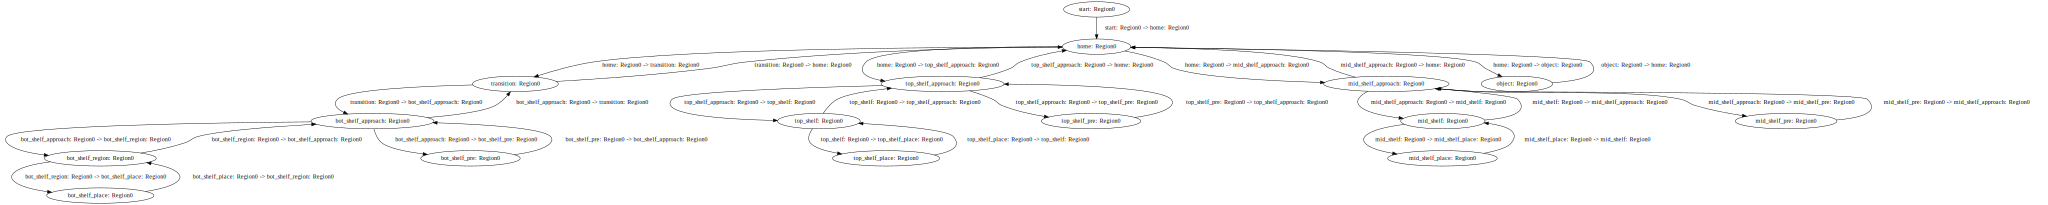

In [5]:
show_gcs_graph(planner.gcs)

# Plan a Path

In [6]:
object_point_node = planner.gcs.AddRegions([Point(np.concat([q_Object, np.zeros(WSG_LEN)]))], order=0, name="object_point")
planner.gcs.AddEdges(object_point_node, planner.nodes["object"])
planner.gcs.AddEdges(planner.nodes["object"], object_point_node)
sim_env.set_iiwa_position(q_Object)
sim_env.publish_diagram()

In [7]:
obj_to_top_pre_traj = planner.solve_gcs(object_point_node, planner.nodes["top_shelf_pre"])
obj_to_top_pre_wsg = create_wsg_traj(obj_to_top_pre_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_CLOSED)
pre_to_top_traj = planner.solve_gcs(planner.nodes["top_shelf_pre"], planner.nodes["top_shelf_place"])
pre_to_top_wsg = create_wsg_traj(pre_to_top_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_OPENED)
obj_to_top_traj = concat_iiwa_traj(obj_to_top_pre_traj, pre_to_top_traj)
obj_to_top_wsg = concat_wsg_traj(obj_to_top_pre_wsg, pre_to_top_wsg)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found
INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.


INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found


In [8]:
sim_env.visualize_traj(obj_to_top_traj)

In [9]:
obj_to_mid_pre_traj = planner.solve_gcs(object_point_node, planner.nodes["mid_shelf_pre"])
obj_to_mid_pre_wsg = create_wsg_traj(obj_to_mid_pre_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_CLOSED)
pre_to_mid_traj = planner.solve_gcs(planner.nodes["mid_shelf_pre"], planner.nodes["mid_shelf_place"])
pre_to_mid_wsg = create_wsg_traj(pre_to_mid_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_OPENED)
obj_to_mid_traj = concat_iiwa_traj(obj_to_mid_pre_traj, pre_to_mid_traj)
obj_to_mid_wsg = concat_wsg_traj(obj_to_mid_pre_wsg, pre_to_mid_wsg)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found


In [10]:
sim_env.visualize_traj(obj_to_mid_traj)

In [12]:
obj_to_bot_pre_traj = planner.solve_gcs(object_point_node, planner.nodes["bot_shelf_pre"])
obj_to_bot_pre_wsg = create_wsg_traj(obj_to_bot_pre_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_CLOSED)
pre_to_bot_traj = planner.solve_gcs(planner.nodes["bot_shelf_pre"], planner.nodes["bot_shelf_place"])
pre_to_bot_wsg = create_wsg_traj(pre_to_bot_traj.end_time(), WSG_CLOSED, WSG_CLOSED, WSG_OPENED)
obj_to_bot_traj = concat_iiwa_traj(obj_to_bot_pre_traj, pre_to_bot_traj)
obj_to_bot_wsg = concat_wsg_traj(obj_to_bot_pre_wsg, pre_to_bot_wsg)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.


INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found
INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found


In [13]:
sim_env.visualize_traj(obj_to_bot_traj)

In [14]:
mid_to_obj_traj = planner.solve_gcs(planner.nodes["mid_shelf_place"], object_point_node)
mid_to_obj_wsg = create_wsg_traj(mid_to_obj_traj.end_time(), WSG_OPENED, WSG_OPENED, WSG_CLOSED)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.
INFO:anypick_dk.planner:GCS path successfully found


In [15]:
sim_env.visualize_traj(mid_to_obj_traj)

In [16]:
backforth_traj = concat_iiwa_traj(obj_to_mid_traj, mid_to_obj_traj)
backforth_wsg = concat_wsg_traj(obj_to_mid_wsg, mid_to_obj_wsg)

In [17]:
sim_env.visualize_traj(backforth_traj)

# Using the HardwareStation Controller

In [18]:
sim_env.build_diagram_with_controller(obj_to_top_traj, obj_to_top_wsg)

In [19]:
sim_env.set_iiwa_position(q_Object)
sim_env.set_wsg_position(WSG_OPENED)
sim_env.publish_diagram()
sim_env.simulate()

INFO:anypick_dk.sim_environment:Simulation will run for 8.791679284944172 seconds


In [20]:
sim_env.build_diagram_with_controller(obj_to_mid_traj, obj_to_mid_wsg)

In [21]:
sim_env.set_iiwa_position(q_Object)
sim_env.set_wsg_position(WSG_OPENED)
sim_env.publish_diagram()
sim_env.simulate()

INFO:anypick_dk.sim_environment:Simulation will run for 7.712075899828254 seconds


In [22]:
sim_env.build_diagram_with_controller(obj_to_bot_traj, obj_to_bot_wsg)

In [23]:
sim_env.set_iiwa_position(q_Object)
sim_env.set_wsg_position(WSG_OPENED)
sim_env.publish_diagram()
sim_env.simulate()

INFO:anypick_dk.sim_environment:Simulation will run for 9.02441448648112 seconds


In [24]:
sim_env.build_diagram_with_controller(mid_to_obj_traj, mid_to_obj_wsg)

In [25]:
sim_env.set_iiwa_position(q_MidShelfPlace)
sim_env.set_wsg_position(WSG_OPENED)
sim_env.publish_diagram()
sim_env.simulate()

INFO:anypick_dk.sim_environment:Simulation will run for 6.575122917567684 seconds


In [26]:
sim_env.build_diagram_with_controller(backforth_traj, backforth_wsg)

In [27]:
sim_env.set_iiwa_position(q_Object)
sim_env.set_wsg_position(WSG_OPENED)
sim_env.publish_diagram()
sim_env.simulate()

INFO:anypick_dk.sim_environment:Simulation will run for 13.28719881739594 seconds
